In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# Importing data
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

y_train = df_train['label']     
X_train = df_train.drop('label',axis=1)

In [59]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

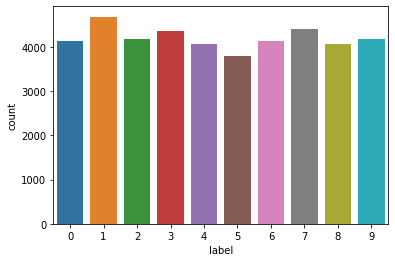

In [60]:
sns.countplot(y_train)

# dataset is balanced between all the numbers, no need to alter the distributions of the data. 

Checking for missing data

In [61]:
y_train.isnull().describe()

count     42000
unique        1
top       False
freq      42000
Name: label, dtype: object

In [62]:
X_train.isnull().describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [63]:
def scale(data):
    # Scaling the data to be between 0 and 1 since the images we're going to be working with will be grey scale
    print (type(data))
    scaled_data = data/np.max(data.values)
    print (type(scaled_data))
    return scaled_data


In [64]:
X_train = scale(X_train)
df_test = scale(df_test)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [69]:
# Reshaping data.
X_train_np = X_train.values.reshape(-1,28,28,1)

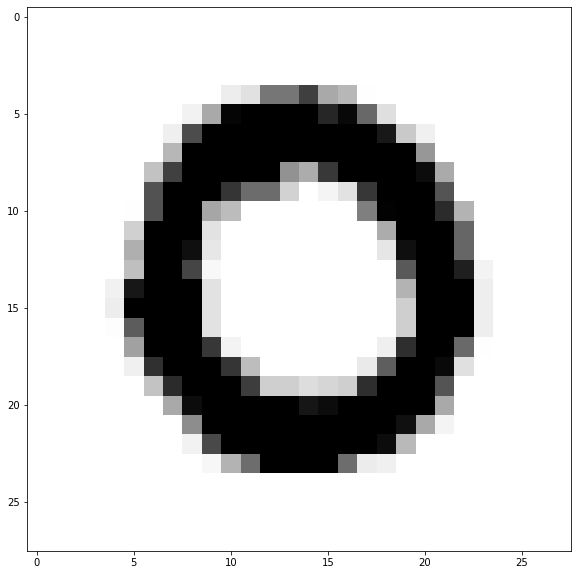

In [91]:
plt.figure(figsize=(10,10))
plt.imshow(X_train_np[1][:,:,0],cmap='gist_gray_r')

In [78]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

In [82]:
# Generating one-hot encoding for the labels 
print(to_categorical(y_train, num_classes=10))
print(y_train)

# E.g. 2 ---> 0,0,1,0,0,0,0,0,0,0,0

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [84]:
y_train_OneHot = to_categorical(y_train,num_classes=10)

""" At this point we have: 
- X_train_np = reshaped, scaled training set 
- y_train_OneHot = one hot encoded labels for numbers between 0-10"""

In [93]:
X_train_np.shape

(42000, 28, 28, 1)

In [136]:
# For the purposes of training speeds I'm going to reduce the number of images we have by a factor of 10
X_train_samp = X_train.sample(frac=0.1,random_state=101).values.reshape(-1,28,28,1)
y_train_samp = y_train.sample(frac=0.1,random_state=101).values
y_train_samp_OneHot = to_categorical(y_train_samp,num_classes=10)
test_samp = df_test.sample(frac=0.1,random_state=101).values.reshape(-1,28,28,1)

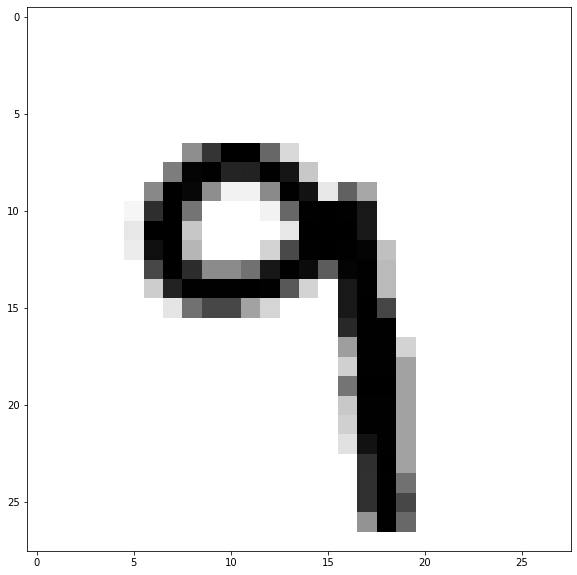

In [137]:
plt.figure(figsize=(10,10))
plt.imshow(X_train_samp[5][:,:,0],cmap='gist_gray_r')

In [138]:
y_train_samp[5]

9

In [139]:
# -------- Perturbing our data ----------------
# Now we have the downsampled training and testing sets for our model to fit and predict on. However, to increase the number of datapoints its also important to perturb your data e.g. add noise, rotate, zoom, crop etc etc. This increases the generality of your model and reduces the likelihood of overfitting. 

In [140]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [141]:
"""# Example of all possible augmentations you can do :
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

Note: this class is used in real time, so you wont have a 'viewable' separate dataset to see. It augments it as the model is fitting in model.fit (very clever, really like this)

"""

'# Example of all possible augmentations you can do :\ntf.keras.preprocessing.image.ImageDataGenerator(\n    featurewise_center=False,\n    samplewise_center=False,\n    featurewise_std_normalization=False,\n    samplewise_std_normalization=False,\n    zca_whitening=False,\n    zca_epsilon=1e-06,\n    rotation_range=0,\n    width_shift_range=0.0,\n    height_shift_range=0.0,\n    brightness_range=None,\n    shear_range=0.0,\n    zoom_range=0.0,\n    channel_shift_range=0.0,\n    fill_mode="nearest",\n    cval=0.0,\n    horizontal_flip=False,\n    vertical_flip=False,\n    rescale=None,\n    preprocessing_function=None,\n    data_format=None,\n    validation_split=0.0,\n    dtype=None,\n)\n\nNote: this class is used in real time, so you wont have a \'viewable\' separate dataset to see. It augments it as the model is fitting in model.fit (very clever, really like this)\n\n'

In [142]:
Augmentations = ImageDataGenerator(
    rotation_range=20, # randomly rotating the images by a max of +/- 20 degrees
    zoom_range=0.1, # randomly zooming images by 0.1 
    width_shift_range=0.1, # randomly shifting images by +/- 10% of image size horizontally
    height_shift_range=0.1, # randomly shifting images by +/- 10% of image size vertically
)

In [143]:
X_train_samp_Aug = Augmentations.fit(X_train_samp)

In [144]:
np.array(X_train_samp_Aug)

array(None, dtype=object)

In [145]:
print ("Number of samples in original training set = "+str(X_train.shape[0]))
print ("Number of samples in down-sampled training set = "+str(X_train_samp.shape[0]))

Number of samples in original training set = 42000
Number of samples in down-sampled training set = 4200


In [146]:
# -------------------------- model creation --------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,LayerNormalization,BatchNormalization

Conv2D layer params: 
- filters       - number of different filters to try convolve with input 
- kernel size   - size of filters (in pixels)
- padding       - 'same' means that output dimensions = input dimensions
                - 'valid' means no padding and output dimensions != input dimensions
- activation    - activation function

MaxPool2D params: 
- pool_size     - number of pixels overwhich the max pooling will apply to 
- strides       - amount the max pooling moves between applications (in pixels) 
- padding       - same as above 

In [147]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(676,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [156]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [158]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 676)               2120612   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [160]:
# Fitting params
val_split = 0.2
batch_size = 256
epochs = 20

In [161]:
history = model.fit(X_train_samp, y_train_samp_OneHot, batch_size = batch_size, epochs = epochs, 
                    validation_split =0.2)

Epoch 1/20
14/14 [==============================] - 2s 163ms/step - loss: 0.2141 - accuracy: 0.9312 - val_loss: 0.2280 - val_accuracy: 0.9310
Epoch 2/20
14/14 [==============================] - 2s 148ms/step - loss: 0.1789 - accuracy: 0.9479 - val_loss: 0.1908 - val_accuracy: 0.9440
Epoch 3/20
14/14 [==============================] - 2s 160ms/step - loss: 0.1621 - accuracy: 0.9503 - val_loss: 0.1778 - val_accuracy: 0.9440
Epoch 4/20
14/14 [==============================] - 2s 145ms/step - loss: 0.1318 - accuracy: 0.9607 - val_loss: 0.1617 - val_accuracy: 0.9512
Epoch 5/20
14/14 [==============================] - 2s 148ms/step - loss: 0.1105 - accuracy: 0.9646 - val_loss: 0.1539 - val_accuracy: 0.9536
Epoch 6/20
14/14 [==============================] - 2s 145ms/step - loss: 0.1024 - accuracy: 0.9667 - val_loss: 0.1438 - val_accuracy: 0.9512
Epoch 7/20
14/14 [==============================] - 2s 145ms/step - loss: 0.0969 - accuracy: 0.9664 - val_loss: 0.1356 - val_accuracy: 0.9595
Epoch 

In [166]:
history.values()

AttributeError: 'History' object has no attribute 'values'